In [1]:
import numpy as np
import pandas as pd
import math, os
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read in from CSV
os.chdir('/Users/z/Python/Baseline Prediction')
df = pd.read_csv("ua_250k.csv")

# Removing Columns
df = df.drop(columns=['Unnamed: 0'])
df.head()

# Cleaning code
#filtered_data = df.drop(columns=['Drop','Drop.1','Drop.2','Drop.3','Unnamed: 0','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'])
#filtered_data.head()
#filtered_data.to_csv('ua_empty_columns_removed.csv')

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,srcIP,Timestamp,Request,Response,Size,URL,UA
0,109.169.248.247,[12/Dec/2015:18:25:11,GET /administrator/ HTTP/1.1,200,4263,-,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
1,109.169.248.247,[12/Dec/2015:18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,http://almhuette-raith.at/administrator/,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
2,46.72.177.4,[12/Dec/2015:18:31:08,GET /administrator/ HTTP/1.1,200,4263,-,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
3,46.72.177.4,[12/Dec/2015:18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,http://almhuette-raith.at/administrator/,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
4,83.167.113.100,[12/Dec/2015:18:31:25,GET /administrator/ HTTP/1.1,200,4263,-,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...


In [3]:
# Define attacks
def attack_success(row):
    if "wp-login.php" in row['Request']:
        return 1
    if "access.log" in row['Request']:
        return 1
    else:
        return 0

In [4]:
# Apply this definition to a new column called 'attack_success'
df['Attack'] = df.apply(attack_success, axis=1)

In [5]:
df.head()

,srcIP,Timestamp,Request,Response,Size,URL,UA,Attack
0,109.169.248.247,[12/Dec/2015:18:25:11,GET /administrator/ HTTP/1.1,200,4263,-,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,0
1,109.169.248.247,[12/Dec/2015:18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,http://almhuette-raith.at/administrator/,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,0
2,46.72.177.4,[12/Dec/2015:18:31:08,GET /administrator/ HTTP/1.1,200,4263,-,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,0
3,46.72.177.4,[12/Dec/2015:18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,http://almhuette-raith.at/administrator/,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,0
4,83.167.113.100,[12/Dec/2015:18:31:25,GET /administrator/ HTTP/1.1,200,4263,-,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249999 entries, 0 to 249998
Data columns (total 8 columns):
srcIP        249999 non-null object
Timestamp    249999 non-null object
Request      249999 non-null object
Response     249999 non-null int64
Size         249999 non-null object
URL          249944 non-null object
UA           249976 non-null object
Attack       249999 non-null int64
dtypes: int64(2), object(6)
memory usage: 15.3+ MB


In [7]:
df['Attack'].value_counts()

0    245935
1      4064
Name: Attack, dtype: int64

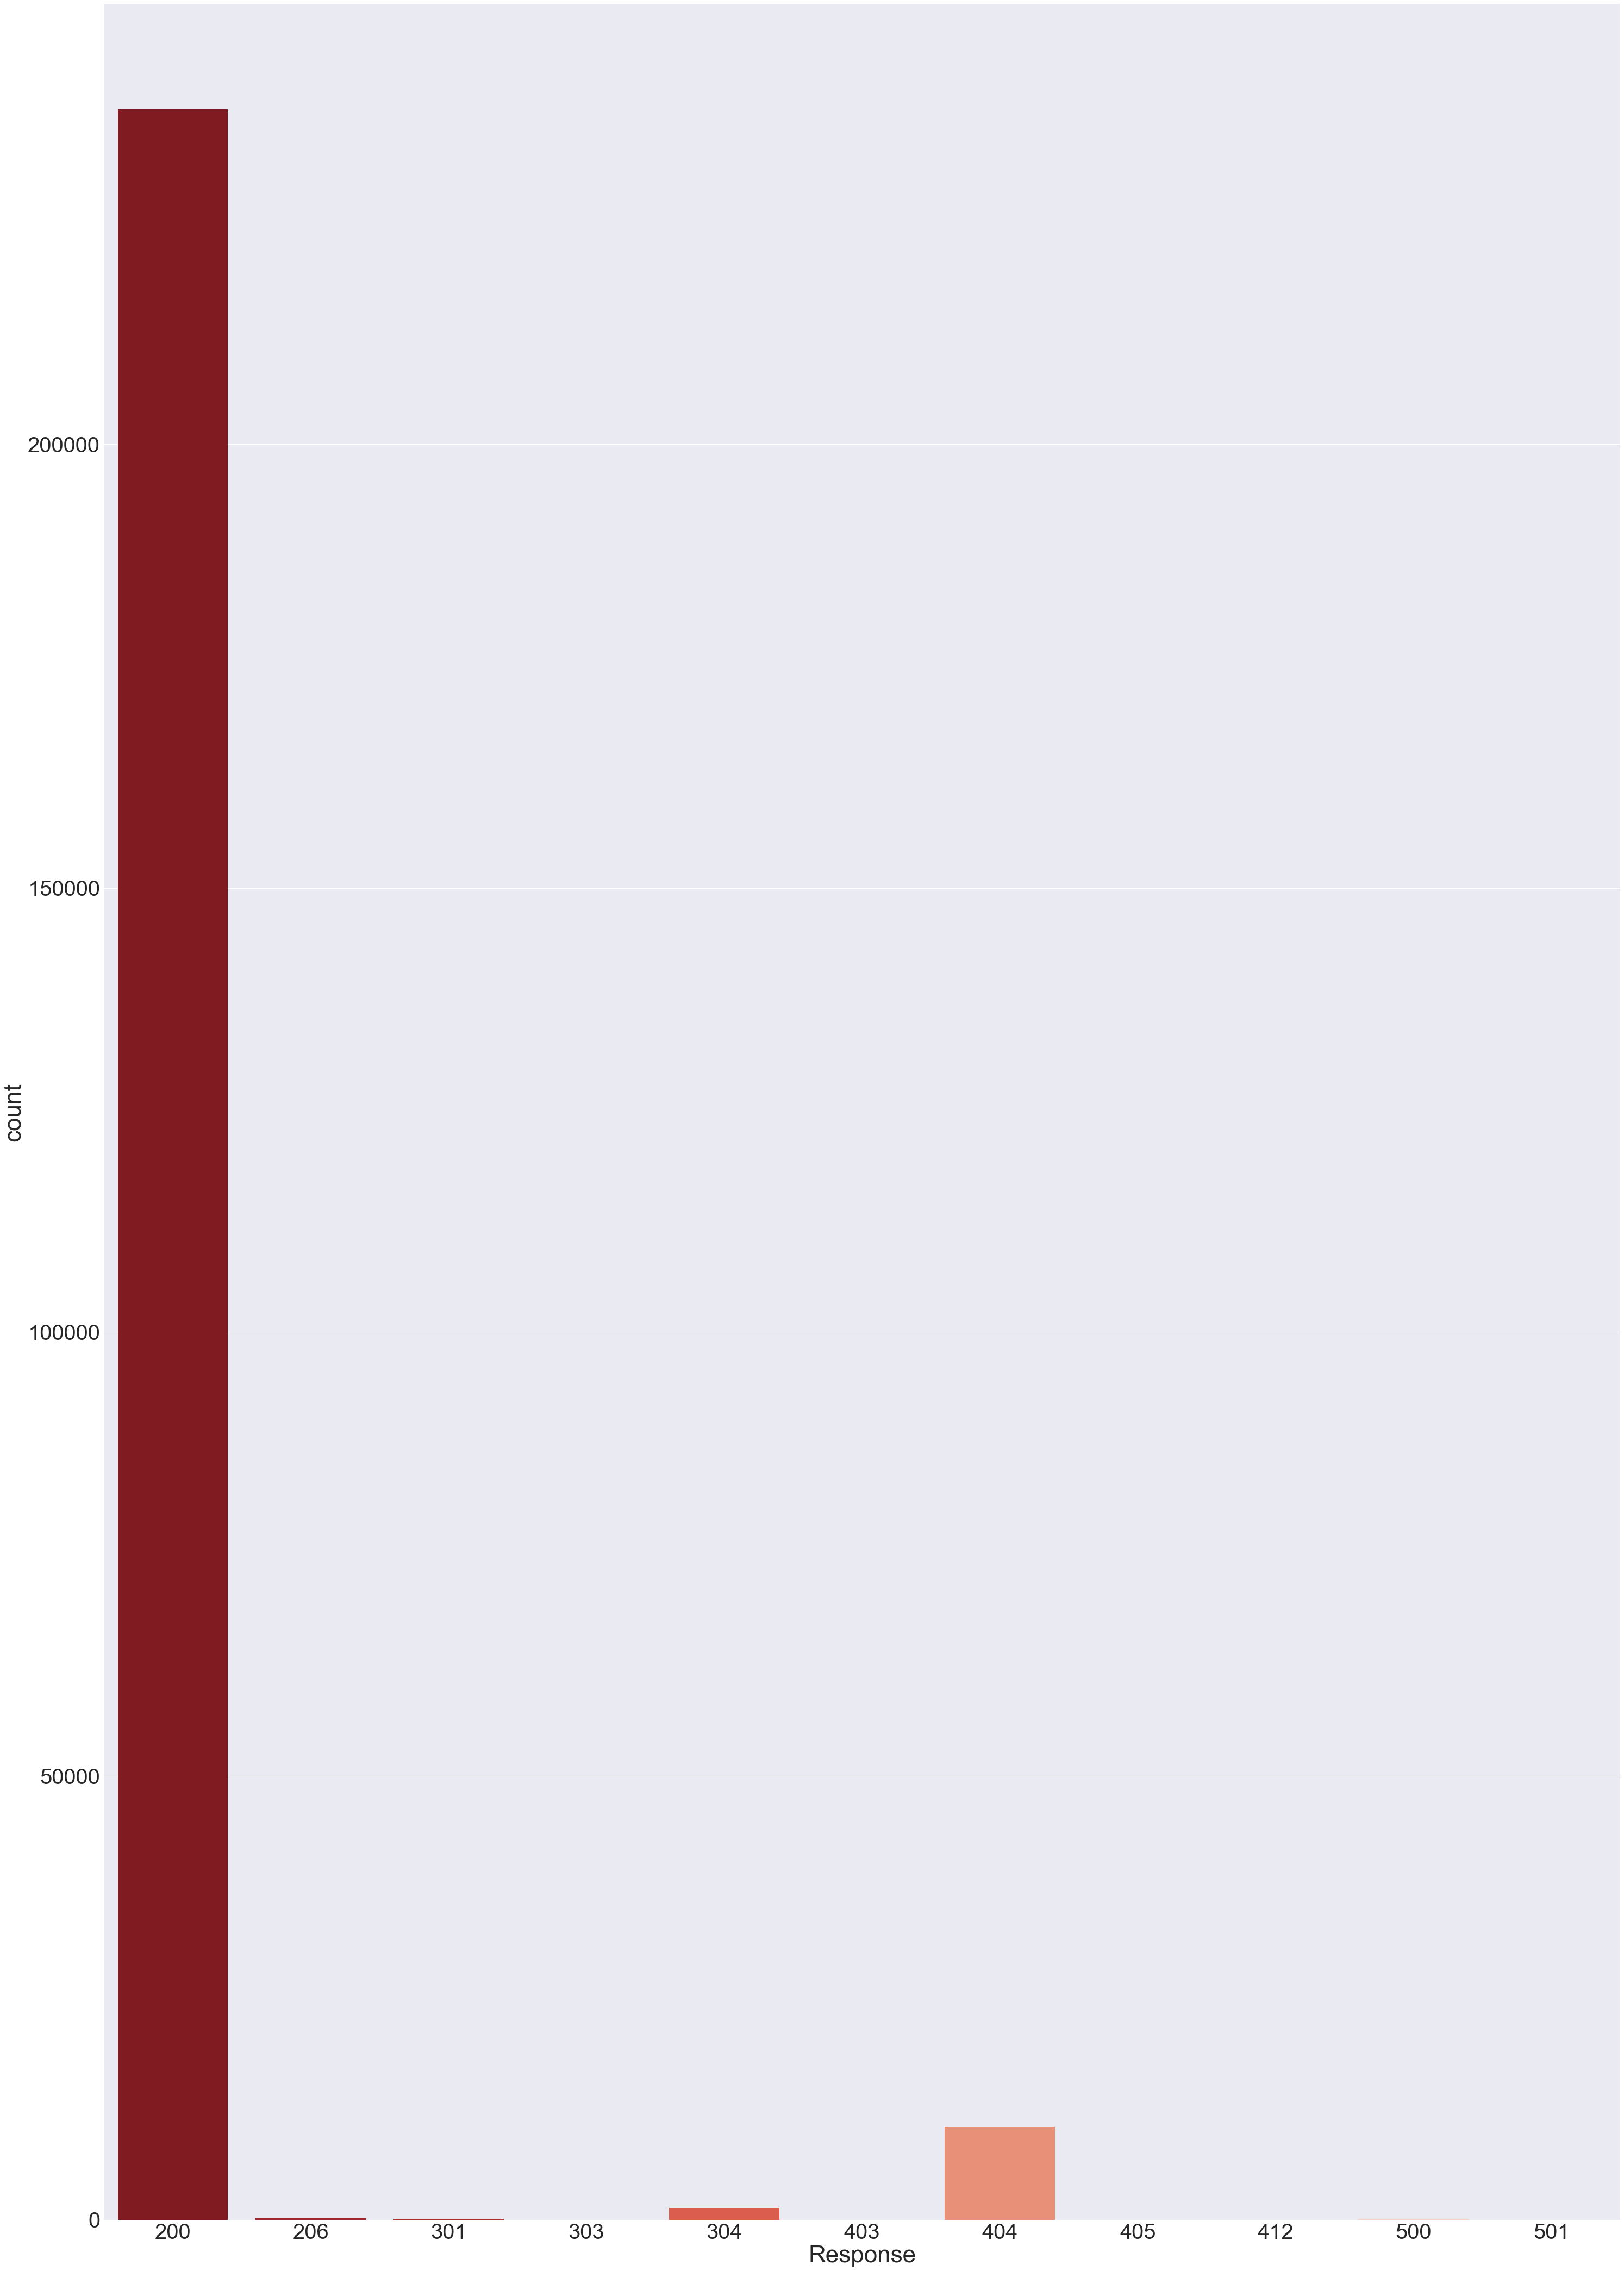

In [8]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

sns.set(rc={'figure.figsize':(50,75)})
sns.set(font_scale=4) 
sns.countplot(x="Response", data=df, palette="Reds_r")

In [9]:
# Determine the amount of unique objects
df.srcIP.unique()

array(['109.169.248.247', '46.72.177.4', '83.167.113.100', ...,
       '200.148.166.42', '177.134.189.192', '177.180.140.8'], dtype=object)

In [10]:
df.UA.unique()

array(['Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20100101 Firefox/34.0',
       'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36',
       'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Maxthon/4.4.3.4000 Chrome/30.0.1599.101 Safari/537.36',
       ...,
       'Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Version/9.0 Mobile/13F69 Safari/601.1',
       'Mozilla/5.0 (Linux; Android 4.4.2; GT-I9195 Build/KOT49H) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.89 Mobile Safari/537.36',
       'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:17.0) Gecko/20100101 Firefox/17.0'], dtype=object)

In [11]:
df.Response.unique()

array([200, 404, 500, 405, 301, 304, 501, 206, 403, 303, 412])

In [12]:
# Need dummies variables for 'One Hot Encoding' in lieu of categorical variables
src_dummies = pd.get_dummies(df['srcIP'])
#ua_dummies = pd.get_dummies(df['UA'])
response_dummies = pd.get_dummies(df['Response'])

In [13]:
# Take our dummy variables and add them to a new table called 'dummies'
dummies = pd.concat([src_dummies, response_dummies], axis=1)

In [14]:
dummies.head()

,1.0.176.215,1.0.176.241,1.0.176.39,1.0.176.59,1.0.177.252,1.0.178.124,1.0.178.146,1.0.178.41,1.0.178.5,1.0.179.125,...,206,301,303,304,403,404,405,412,500,501
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df.drop(['srcIP','Timestamp','Request','Response','Size','URL','UA','Attack'], axis=1)

In [16]:
# Concatenate the dummy variable table with our 'X' variable table
X = pd.concat([X, dummies], axis=1)

In [17]:
# Add the attack column to the Y variable - this is what we're classifying
Y = df.Attack
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attack, dtype: int64

In [18]:
# Flatten array
Y = np.ravel(Y)

In [19]:
np.any(np.isnan(X))

False

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X,Y)
log_model.score(X,Y) # Accuracy rating

0.98890795563182254

In [22]:
Y.mean() # null error rate

0.016256065024260098

In [23]:
#1 - 0.001 = 99.99
coeff_df = DataFrame(list(zip(X.columns,np.transpose(log_model.coef_))))

In [24]:
#split the data
X_train,X_test, Y_train,Y_test = train_test_split(X,Y)

In [25]:
log_model2 = LogisticRegression() #new LR model
log_model2.fit(X_train,Y_train) #fit model with training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
class_predict = log_model2.predict(X_test) #run a prediction with X_test dataset

In [27]:
print(metrics.accuracy_score(Y_test,class_predict)) #compare y_test to prediction

0.986368
